# DiffusionTS for master thesis

In [9]:
import os
import torch
import numpy as np

from engine.solver import Trainer
from Utils.metric_utils import visualization
from Data.build_dataloader import build_dataloader
from Utils.io_utils import load_yaml_config, instantiate_from_config
from Models.interpretable_diffusion.model_utils import unnormalize_to_zero_to_one

## Setting and training

### Build dataset and settings

In [10]:
class Args_Example:
    def __init__(self) -> None:
        self.config_path = './Config/master_thesis.yaml'
        self.save_dir = './master_thesis'
        self.gpu = 0
        os.makedirs(self.save_dir, exist_ok=True)

args =  Args_Example()
configs = load_yaml_config(args.config_path)
device = torch.device(f'cuda:{args.gpu}' if torch.cuda.is_available() else 'cpu')

dl_info = build_dataloader(configs, args)
model = instantiate_from_config(configs['model']).to(device)
trainer = Trainer(config=configs, args=args, model=model, dataloader=dl_info)

## Training models

In [11]:
trainer.train()

  0%|          | 0/10000 [00:00<?, ?it/s]

training complete


## Inference and visualization

In [17]:
dataset = dl_info['dataset']
seq_length, feature_dim = dataset.window, dataset.var_num
# ori_data = np.load(os.path.join(dataset.dir, f"sine_ground_truth_{seq_length}_train.npy"))
dataset_name = "stock"
ori_data = np.load(os.path.join(dataset.dir, f"{dataset_name}_norm_truth_{seq_length}_train.npy"))  # Uncomment the line if dataset other than Sine is used.
fake_data = trainer.sample(num=len(dataset), size_every=4001, shape=[seq_length, feature_dim])
if dataset.auto_norm:
    fake_data = unnormalize_to_zero_to_one(fake_data)
    np.save(os.path.join(args.save_dir, f'ddpm_fake_master_thesis.npy'), fake_data)

sampling loop time step:   0%|          | 0/30 [00:00<?, ?it/s]

### Visualization

We visualize the original and synthetic data distributions using PCA, tSNE and Density analysis.

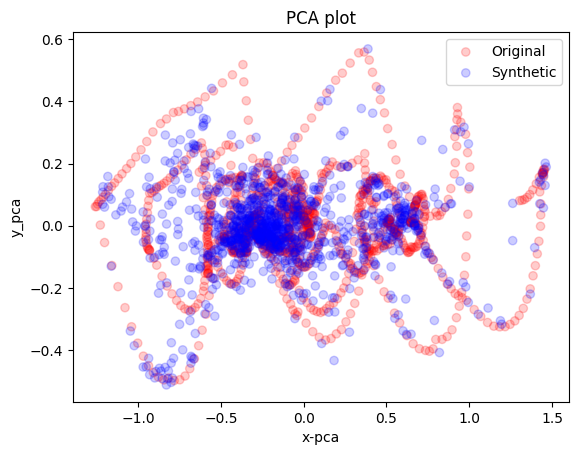

In [18]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='pca', compare=ori_data.shape[0])

/Users/sondrerogde/Dev/master-thesis/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2120 samples in 0.000s...
[t-SNE] Computed neighbors for 2120 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2120
[t-SNE] Computed conditional probabilities for sample 2000 / 2120
[t-SNE] Computed conditional probabilities for sample 2120 / 2120
[t-SNE] Mean sigma: 0.058318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.101509
[t-SNE] KL divergence after 300 iterations: 1.398247


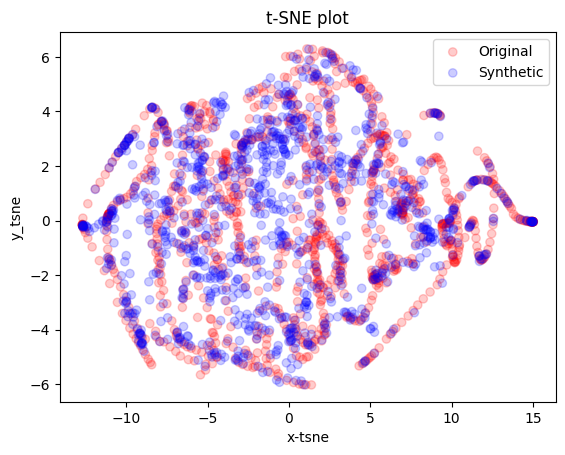

In [19]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='tsne', compare=ori_data.shape[0])

/Users/sondrerogde/Dev/master-thesis/src/models/data_generating_models/Diffusion-TS-main/Utils/metric_utils.py:157: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prep_data, hist=False, kde=True, kde_kws={'linewidth': 5}, label='Original', color="red")
/Users/sondrerogde/Dev/master-thesis/src/models/data_generating_models/Diffusion-TS-main/Utils/metric_utils.py:158: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to u

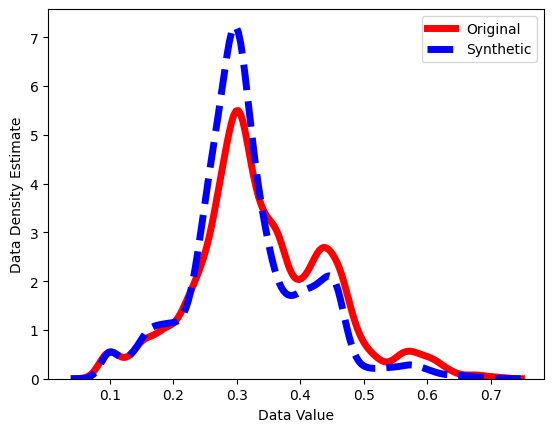

In [20]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='kernel', compare=ori_data.shape[0])

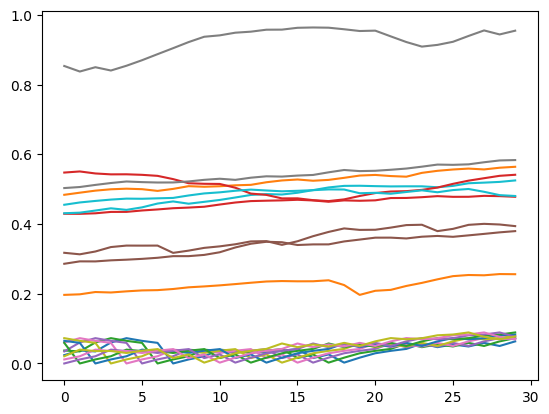

In [21]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.plot(ori_data[i, :, 0])
    plt.plot(fake_data[i, :, 0])
plt.show()
